In [3]:
conda install -c conda-forge librosa
conda install -c numba numba

SyntaxError: invalid syntax (<ipython-input-3-12273e94a2e7>, line 1)

**Run above terminal if you wish to code along**

In [4]:
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
import librosa.display as ld
# Get example audio file
filename = './audio.ogg'

data, samplerate = sf.read(filename, dtype='float32')
data = data.T
data
samplerate

44100

## Librosa: 

I have found a python open-source package named librosa on github. The  built in visualizer is pretty nifty although not being necessary for the scope of the project. The main benefit I see with this data is that it returns my audio file as a numpy array. This will make it substantially easier to feed my model. 

I will make several columns in my df:
- A label of language (to be used as label column)
- The array generated by soundfile (to be used feature array)
- A label for which recording the data file was generated from and which order it occured in the sequence. (To make error tracing simpler)



Text(0.5, 1.0, 'Linear-frequency power spectrogram')

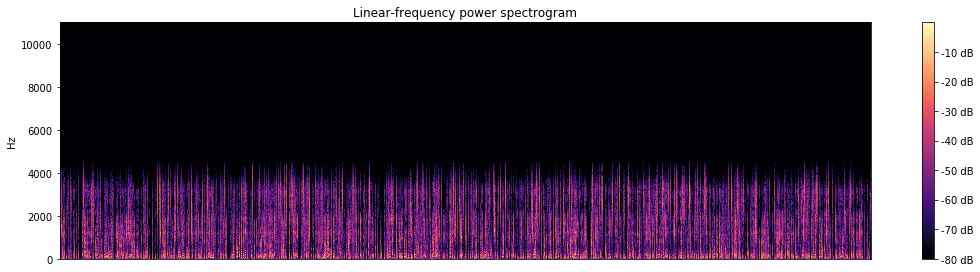

In [5]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
plt.figure(figsize=(40, 20))
plt.subplot(4, 2, 1)
ld.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

In [6]:
data

array([ 0.00044994,  0.00044786,  0.00050268, ...,  0.00048477,
       -0.00133691, -0.00263767], dtype=float32)

In [7]:
data.shape

(38359296,)

### Further Exploration to include:

Chopping Data and mapping features to labels by using pandas.

Not much else in preliminary Data Exploration:

### Modeling:

Modeling will be done with Neural Networks. More research will be conducted on current Architecture for Audio processing models. 

An initial model will be generated to detect language. I would like this model to be as shallow and narrow as possible so that in deployment it would be able to identify languages quickly. And allow all or most working data to be stored in L1 or L2 cache. 

The model will make use of convolutions to help isolate features regardless of positioning in data. A semi-wide feed to Fully connected is going to be used to allow for many features to be detected and used in predicting.

This model is the base goal for my project.

Additional Models:

The next step would be to use RNN's with LTSM to convert live speech to text. I will initally only be doing this with English Data since I can verify accuracy by ear and sight quickly.

Transfer learning would then be used (with minimal replacement) to train a model to recognize German Data that was located online. 

If a promising result can be obtain from this I will then pull from various Translation DataSets I found online. I will send Snippets of the data to some German Grad students I've met online to assist in verifying whether the translations are reasonably accurate and capture nuanced differences in the language. 

A third (fourth) model will then be built (and transfer learned) to translate the data. (Using as large of a Syntax flow (Sentence vs. Paragraph) as possible)

### Expectations:

Modeling will probably take the majority of the time for this project. And the later steps will likely have to be completed after graduation.

Given limited resources (financially) to big data solutions I imagine I will run into road blocks while training the later models.

Given the expected (relatively) shallow nature of my preliminary model I suspect my local GPU should handle it well.